In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# tạo mảng phân phối chuẩn (mean, var)
mean = 0
var = 1
size = 1000
Xtrain = np.random.randn(size).tolist()

In [3]:
def CharacterFunction(x):
    if x < 1 and x > -1:
        return 1
    else:
        return 0    

In [4]:
CharacterFunction(0.5)

1

In [5]:
def recK(x):
    return 0.5*CharacterFunction(x)
def triK(x):
    return (1 - abs(x))*CharacterFunction(x)
def paraK(x):
    return 0.75*(1 - x**2)*CharacterFunction(x)
def quarK(x):
    return 15/16*(1 - x**2)**2*CharacterFunction(x)
def GaussK(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def silK(x):
    return 0.5 * np.exp(-abs(x)/np.sqrt(2)) * np.sin(abs(x)/np.sqrt(2) + np.pi/4)

In [6]:
np.exp(0)

1.0

In [7]:
def KernelEstimation(data, typeKernel, h, x):
    '''
    data: 1D array
    typeKernel: 1: rectangular (uniform) Kernel
                2: triangle Kernel
                3: Epanechnikov (parabolic) Kernel
                4: Quartic (biweight) Kernel
                5: Gauss Kernel
                6: Silverman (Sil) Kernel
    h: bandwidth
    '''
    n = len(data)
    K = 0
    if typeKernel ==1:
        for X in data:
            K+= recK((X-x)/h)
    if typeKernel ==2:
        for X in data:
            K+= triK((X-x)/h)
    if typeKernel ==3:
        for X in data:
            K+= paraK((X-x)/h)
    if typeKernel ==4:
        for X in data:
            K+= quarK((X-x)/h)
    if typeKernel ==5:
        for X in data:
            K+= GaussK((X-x)/h)
    else:
        for X in data:
            K+= silK((X-x)/h)
    f = K / (n*h)
    return f

In [14]:
# tạo mảng phân phối chuẩn (mean, var)
mean = 0
var = 1
size = 1000
Xtest = np.random.randn(size)
Xtest

array([ 9.33263844e-01,  6.29649777e-01, -5.44413966e-01, -8.65866521e-01,
       -2.14025645e-01, -1.22329552e+00,  4.31529106e-01,  8.56015912e-02,
       -2.38035055e-01,  1.69008933e+00,  4.74652973e-01, -2.84555600e-01,
       -4.41883098e-01, -5.89177556e-01,  1.14248228e+00, -1.00152193e-02,
       -7.53929939e-01,  5.40222522e-01,  1.98251898e+00, -6.65024850e-02,
       -9.63137754e-01, -1.01572897e+00,  9.24105044e-01,  1.76433075e-01,
        2.11957633e-01,  1.00216044e+00, -2.06346631e-01,  1.30476008e+00,
        1.91006638e+00, -1.35930021e+00,  1.48847231e+00,  2.76452728e-01,
        1.17060891e-01,  2.40610926e-01, -2.84304371e-01, -1.06130846e+00,
       -1.50215488e+00, -5.87894828e-01,  7.82039890e-01, -2.67866617e-01,
        2.28448068e+00,  1.24750777e+00, -3.35425480e-01,  2.36463052e-02,
       -2.87592581e-01, -1.06265189e+00,  9.05399069e-01, -8.99511655e-01,
       -1.84631663e-01,  2.08081215e+00, -9.86725775e-02,  5.11681999e-01,
        3.63192328e-01, -

In [9]:
def f(x):
    return KrernelEstimation(data=Xtrain,typeKernel=5, h=0.01, x=Xtest)

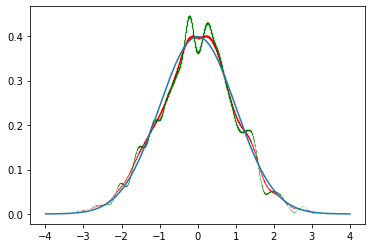

In [10]:
x = np.linspace(-4,4,1000)
# plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=1, x=Xtest), 'ob', ms=0.05)
plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.2, x=Xtest), 'or', ms=0.05)
plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=Xtest), 'og', ms=0.05)
# plt.scatter(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=Xtest), linewidths=0.01)
plt.plot(x, norm.pdf(x))

In [ ]:
x = np.linspace(-4,4,1000)
# plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=1, x=Xtest), 'ob', ms=0.05)
plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.2, x=Xtest), 'or', ms=0.05)
plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=Xtest), 'og', ms=0.05)
# plt.scatter(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=Xtest), linewidths=0.01)
plt.plot(x, norm.pdf(x))

In [20]:
x = np.linspace(-4,4,1000)
def f(x, typeKernel):
    return KernelEstimation(data=Xtrain,typeKernel=typeKernel, h=0.2, x=x)

# plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=6, h=0.2, x=Xtest), 'ob', ms=0.05)
# plt.plot(Xtest, yTest, 'or', ms=0.05)
# plt.plot(Xtest, KernelEstimation(data=Xtrain,typeKernel=3, h=0.2, x=Xtest), 'og', ms=0.05)
# plt.scatter(Xtest, KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=Xtest), linewidths=0.01)
# plt.plot(x, norm.pdf(x))

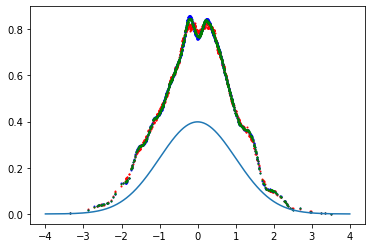

In [23]:
def plot(Xtest, Xtrain, typeKernel, h, color):
    yTest = []
    for x in Xtest:
        yTest.append(f(x, typeKernel))
    plt.plot(Xtest, yTest, color, ms=1)
plot(Xtest, Xtrain, typeKernel=1, h=0.5, color='or')
plot(Xtest, Xtrain, typeKernel=2, h=0.5, color='ob')
plot(Xtest, Xtrain, typeKernel=3, h=0.5, color='og')
plt.plot(x, norm.pdf(x))



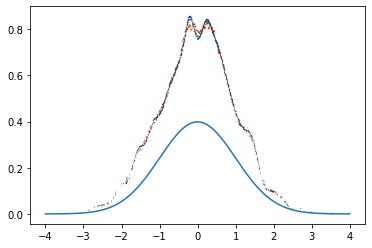

In [24]:
def plot(Xtest, Xtrain, typeKernel, h, color):
    yTest = []
    for x in Xtest:
        yTest.append(f(x, typeKernel))
    plt.plot(Xtest, yTest, color, ms=0.1)
plot(Xtest, Xtrain, typeKernel=1, h=0.2, color='or')
plot(Xtest, Xtrain, typeKernel=2, h=0.2, color='ob')
plot(Xtest, Xtrain, typeKernel=3, h=0.2, color='og')
plt.plot(x, norm.pdf(x))

